# Assignment 2: Shubhayan Bhattacharya, IIT Madras (GroupB, ML)

#### Importing the libraries and data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
tips = sns.load_dataset("tips")


#### Finding the number of rows and columns in the data frame

In [2]:
tips.shape

(244, 7)

#### Observing the first five data

In [3]:
tips.head ()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Basic description of data

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Independent variables in the data frame

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Independent variables 

1. total_bill (numeric)

2. tip (numeric)

3. sex (categorical: "Male", "Female")

4. smoker (categorical: "Yes", "No")

5. day (categorical: "Thur", "Fri", "Sat", "Sun")

6. time (categorical: "Lunch", "Dinner")

7. size (numeric)

#### For checking if there are missing values in the data set

In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Number of male and female in the data set

In [7]:
tips.sex.tolist().count('Male')


157

In [8]:
tips.sex.tolist().count ('Female')

87

### Data visualization

#### Distribution plot for total bill

Text(0.5, 1.0, 'Distribution plot for total bill')

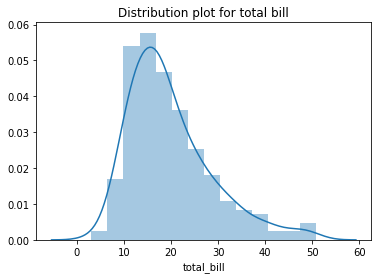

In [9]:

sns.distplot(tips.total_bill)
plt.title ('Distribution plot for total bill')


#### Observations/comments from the above plot

- The total bill spans from less than 5 to nearly 60
- The average total bill has a maxima less than 20 which can also be seen in the basic desciption of data but this gives us a visual insight to that


#### Distribution plot for tip

Text(0.5, 1.0, 'Distribution plot for tip')

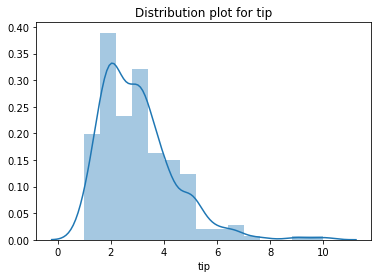

In [10]:
sns.distplot(tips['tip'], kde=True, bins=15)
plt.title('Distribution plot for tip')

#### Pair plot of tip, total bill and size

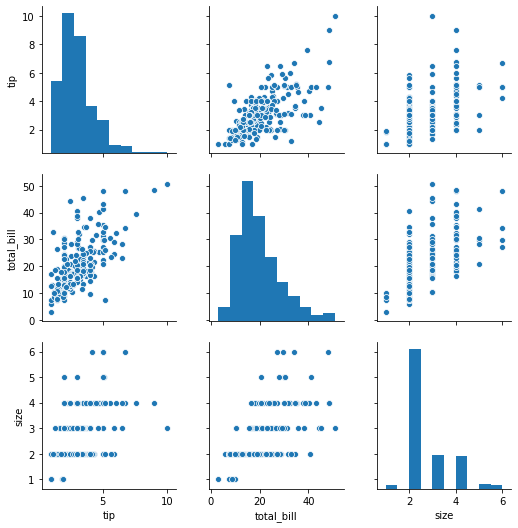

In [11]:
sns.pairplot(tips[['tip','total_bill','size']])

#### Observations/comments from the pair plot above
- There is a clear linear relationship between the total bill and tip. We clearly see that the total_bill is above 20 the tip in most cases is above 2. 
- Other pair plots do not show any such relationship between one another

#### Checking the effect of a third variable


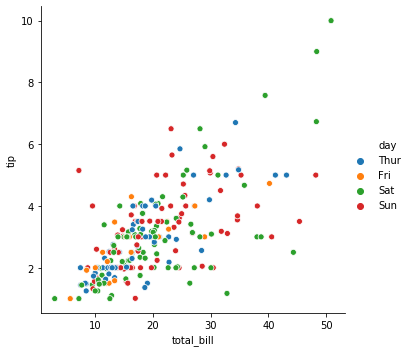

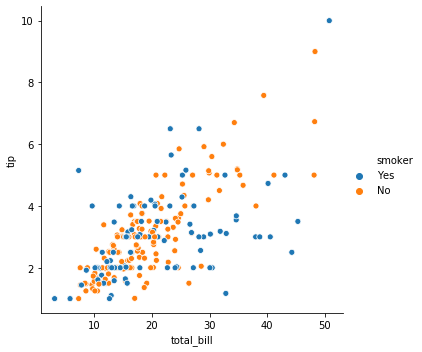

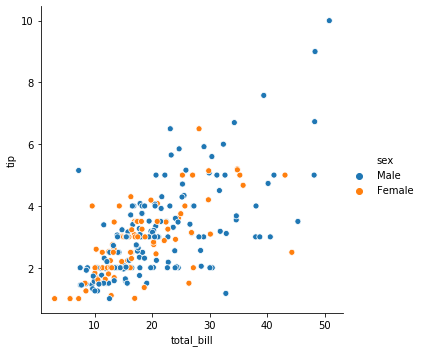

In [12]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)


#### Checking independence between the independent variables

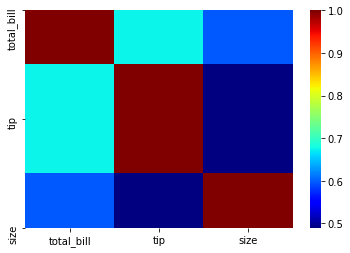

In [13]:
sns.heatmap(tips.corr(),cmap='jet')

#### Average total bill, tip and size according to day

In [14]:
tips.groupby('day').mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


#### Observations from the above result

- The percentage of tip with respect to the total bill for Thur, Fri, Sat and Sun are 15.67%, 15.94%, 14.64% and 15.20 % respectively and hence the amount of tip does not vary much in the weekdays or weekend. 

#### Average total bill, tip and size according to sex

In [15]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


#### Observations from the above result

- The percentage of tip with respect to the total bill for male and female are 14.89% and 15.69 % respectively
- The average total_bill amount of females are less than that of males

In [16]:
day_name=list(set(tips.day.tolist()))

In [17]:
day_name[0]

'Sat'

In [18]:
np.sum(np.array(tips.total_bill)>20)

97

In [19]:
tips.groupby(['sex','day','smoker', 'time']).size()

sex     day   smoker  time  
Male    Thur  Yes     Lunch     10
              No      Lunch     20
        Fri   Yes     Lunch      3
                      Dinner     5
              No      Dinner     2
        Sat   Yes     Dinner    27
              No      Dinner    32
        Sun   Yes     Dinner    15
              No      Dinner    43
Female  Thur  Yes     Lunch      7
              No      Lunch     24
                      Dinner     1
        Fri   Yes     Lunch      3
                      Dinner     4
              No      Lunch      1
                      Dinner     1
        Sat   Yes     Dinner    15
              No      Dinner    13
        Sun   Yes     Dinner     4
              No      Dinner    14
dtype: int64

#### Scatter plot for tip for both genders

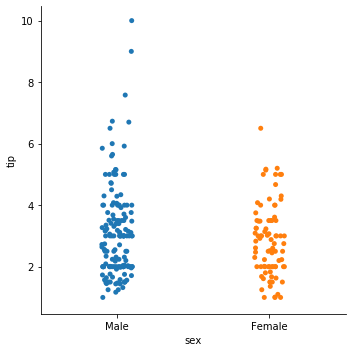

In [20]:
sns.catplot(x="sex", y="tip", data=tips)

#### Observations from the above result
- We can see from the above plot that most of the tips lie between 2 and 4 irrespective of the gender and there are outlier values for both

#### Other scatterplots

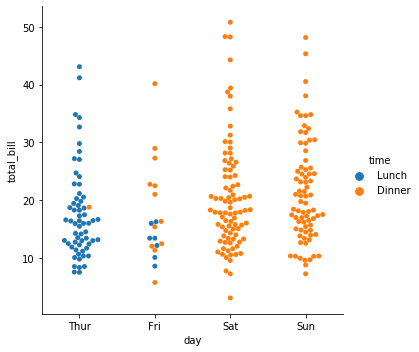

In [21]:
sns.catplot(x="day", y="total_bill", hue="time", kind="swarm", data=tips)

### Observations from the above plot: 
#### (1) It can be clearly seen from the above plot that there are no total_bill data (hence no customers) which implies that the restaurant/hotel is only open during dinner in the weekends. 
#### (2) It can be observed that on Thursday ('Thur') customers only come during lunch time, hence the restaurant may think of shutting down during dinner time. Since there are no customers during dinner the restaurant only incur loss if they keep open at night on Thursday. 
#### (3) It may be suggested that the restaurant can only operate on weekends during dinner time (if they are open during both lunch and dinner). 

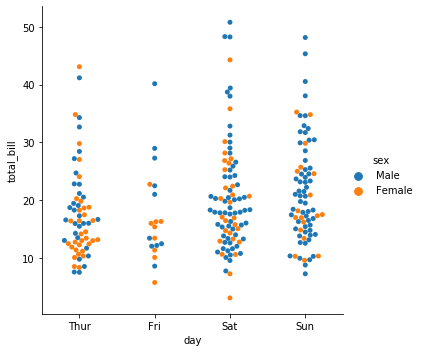

In [22]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

#### Observations from the above plot
-The above plot gives us the total_bill according to the day for both male and female customers. 

#### Box plot of total_bill as a function of day 

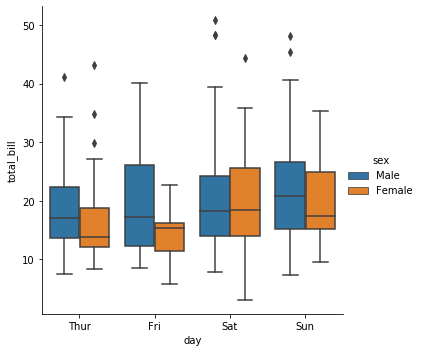

In [23]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips)

#### Observations from the above plot
- The box plot here actually gives all the results that we have already found out from "describe" in a graphical way. 
- The bottom line and the top line of the plot denotes minima and maxima of the total_bill on a particular day. 
- The bottom and top line of the box denotes the first and third quartile 
- While the horizontal line within the box denotes the median of the data
- Any value which lies outside the top line of the plot are outlier values
- We can infer that the total_bill is higher on weekends (Sat, Sun) than on weekdays (Thur, Fri)
- The total_bill on Fri of males are much higher than that of females

#### Box plot of tip as a function of day and sex

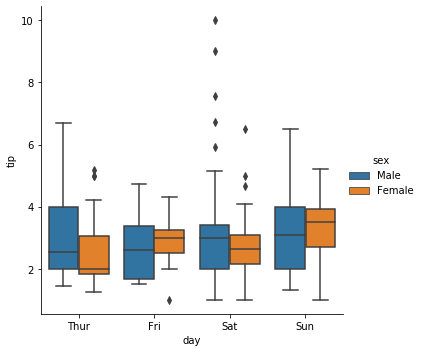

In [24]:
sns.catplot(x="day", y="tip", hue= "sex", kind="box", data=tips)

#### Observations from the above plot of tip vs day
- The tips are a little higher on Sun for both genders
- There are quite a few outlier values on Sat
- The tip value for males are higher than that of females

## Conclusions
- There are no total_bill data (hence no customers) which implies that the restaurant/hotel is only open during dinner in the weekends. 
- On Thursday ('Thur') customers only come during lunch time, hence the restaurant may think of shutting down during dinner time. Since there are no customers during dinner the restaurant only incur loss if they keep open at night on Thursday. 
- It may be suggested that the restaurant can only operate on weekends during dinner time (if they are open during both lunch and dinner). 
- The percentage of tip with respect to the total bill for Thur, Fri, Sat and Sun are 15.67%, 15.94%, 14.64% and 15.20 % respectively and hence the amount of tip does not vary much in the weekdays or weekend. 
- Most of the tips lie between 2 and 4 irrespective of the gender and there are outlier values for bothWe can infer that the total_bill is higher on weekends (Sat, Sun) than on weekdays (Thur, Fri)
- The total_bill on Fri of males are much higher than that of females
- The tips are a little higher on Sun for both genders than on weekdays